## Using NLP predict whether the review is positive or negative for a given dataset 

### Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
from ipynb.fs.full.ml_library import *
import os
os.chdir('/home/admin1/PycharmProjects/Machine Learning using libraries/Classification/Datasets & pickled objects/')

# loading dataset from csv file & storing it as pandas dataframe
review_data = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting= 3)
review_data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


#### Data cleansing

In [2]:
# removing stopwords & getting root words for remaining
feature = 'Review'
corpus = get_corpus(review_data, feature)

#### Creating count vectoriser i.e. mapping count of a word vs each record 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#if we want to define maximum features to be considered
# cv = CountVectorizer(max_features=1500)  # selected 1500 most frequent 1500 features/words

#### Creating features matrix & target variable array

In [4]:
x_values = cv.fit_transform(corpus).toarray()

label = 'Liked'
y_values = review_data[label].values

x_values.shape, y_values.shape

((1000, 1627), (1000,))

#### Splitting dataset into train set & test set

In [5]:
from sklearn.model_selection import train_test_split
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size=0.8, random_state=0)

#### Importing different classifier models 

In [6]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier as DCT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

In [7]:
classifiers = [LR, KNN, SVC, DCT, RF, GaussianNB]
classifier_names = ['Logistic', 'KNN', 'SVM', 'DecisionTree', 'RandomForest', 'GaussianNaiveBayes']

### Building & comparing different classification models using roc curve

AUC Logistic: 0.845360824742268
AUC KNN: 0.6444299869882895
AUC SVM: 0.8468621759583626
AUC DecisionTree: 0.7162946651986788
AUC RandomForest: 0.8445100590531479
AUC GaussianNaiveBayes: 0.7301070963867481


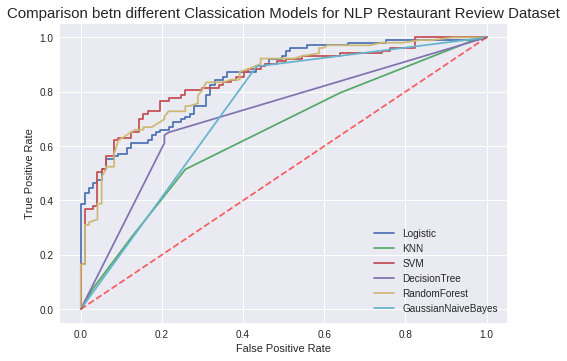

In [8]:
test_predictions = []
classifier_objects = []

plt.style.use('seaborn')
for index in range(len(classifiers)):
    if index ==1 or index==5:
        classifier = classifiers[index]()
    elif index == 2:
        classifier = classifiers[index](random_state= 0, probability=True) 
    else:
        classifier = classifiers[index](random_state= 0) 
    
    # Buiding model & prediting for test set
    classifier.fit(train_x_values, train_y_values)
    test_prediction = classifier.predict(test_x_values)
    
    # storing predictions for each classifier model & stoting classifier model
    test_predictions.append(test_prediction)
    classifier_objects.append(classifier)
    
    # Plotting ROC curve & printing AUC for each 
    test_predicted_probs = classifier.predict_proba(test_x_values)[:,1]
    fpr, tpr, _ = roc_curve(test_y_values, test_predicted_probs)
    calculate_auc(classifier_names[index], fpr, tpr)
    plt.plot(fpr, tpr, label=classifier_names[index])

plt.plot([0,1],[0,1], 'r--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison betn different Classication Models for NLP Restaurant Review Dataset',fontdict={'fontsize':15})
plt.legend()
plt.show()

#### Logistic, SVM, RandomForest models are comparable 

#### We can consider which model to choose according to our goal

In [10]:
for index in range(0,len(classifiers), 2):
    print('<<<<<<<<<<<',classifier_names[index],'>>>>>>>>>>>','\n')
    print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_predictions[index])}\n')
    print(f'Classification report:\n {classification_report(test_y_values, test_predictions[index])}')

<<<<<<<<<<< Logistic >>>>>>>>>>> 

Confusion matrix:
 [[76 21]
 [34 69]]

Classification report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73        97
           1       0.77      0.67      0.72       103

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.73      0.72      0.72       200

<<<<<<<<<<< SVM >>>>>>>>>>> 

Confusion matrix:
 [[89  8]
 [43 60]]

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.92      0.78        97
           1       0.88      0.58      0.70       103

    accuracy                           0.74       200
   macro avg       0.78      0.75      0.74       200
weighted avg       0.78      0.74      0.74       200

<<<<<<<<<<< RandomForest >>>>>>>>>>> 

Confusion matrix:
 [[88  9]
 [39 64]]

Classification report:
               precision    recall  f1-score   support

#### Chosen RandomForest model 

In [ ]:
classifier = classifier_objects[4] 

#### Storing necessary object into pickle file

In [11]:
import joblib
file = open('DataProcessingNLPRestaurantReview.pkl', 'wb')
joblib.dump(feature, file)
joblib.dump(label, file)
joblib.dump(cv, file)
file.close()

file = open('RFModelNLPResturantReview', 'wb')
joblib.dump(classifier, file)
file.close()